In [3]:
%pwd

'c:\\DeepLearning\\aiffel'

In [21]:
import os
import shutil

base_dir = 'C:/DeepLearning/aiffel/data/ex1/data_all_users'
#base_dir=os.getenv("HOME")+'/aiffel/EX/EX1/data_all_users'
train_members = ['경은', '정우', '현빈', '현호', '현지', '서현', '예영', '진영']
test_members = ['정인']
#members = os.listdir(base_dir)
categories = ['rock', 'scissor', 'paper']
train_data_base = 'C:/DeepLearning/aiffel/data/ex1/train_data/'
test_data_base = 'C:/DeepLearning/aiffel/data/ex1/test_data/'

In [22]:
train_data_size = 0
test_data_size = 0

n_img_size = 56

def get_data(members, data_base):
    for member in members:
        for category in categories:
            path = os.path.join(base_dir, member, category)
            for image in os.listdir(path):
                image_rename = member + '_' + image
                image_path_src = os.path.join(base_dir, member, category, image)
                image_path_dst = os.path.join(data_base, category, image_rename)
                shutil.copyfile(image_path_src, image_path_dst)
                print(image_path_srt)

get_data(train_members, train_data_base)
get_data(test_members, test_data_base)

print(f"총 {len(train_members)}명의 학습데이터가 모였습니다!!")
print(f"총 {len(test_members)}명의 테스트데이터가 모였습니다!!")

for category in categories:
    print(f"{category}에 학습데이터 {len(os.listdir(train_data_base+category))}개 ")
    train_data_size += len(os.listdir(train_data_base+category))
print(f"총 {train_data_size}개의 학습데이터가 모였습니다!!")

for category in categories:
    print(f"{category}에 테스트데이터 {len(os.listdir(test_data_base+category))}개 ")    
    test_data_size += len(os.listdir(test_data_base+category))
print(f"총 {test_data_size}개의 학습데이터가 모였습니다!!")    

FileNotFoundError: [Errno 2] No such file or directory: 'C:/DeepLearning/aiffel/data/ex1/train_data/rock\\경은_0.jpg'

In [9]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	#print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(n_img_size,n_img_size)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [10]:
for category in categories:
    resize_images(train_data_base+category)
print("학습 이미지 resize 완료!")

for category in categories:
    resize_images(test_data_base+category)
print("테스트 이미지 resize 완료!")    

800  images resized.
800  images resized.
800  images resized.
학습 이미지 resize 완료!
100  images resized.
100  images resized.
100  images resized.
테스트 이미지 resize 완료!


In [11]:
import numpy as np

def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
     #img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*n_img_size*n_img_size*color,dtype=np.int32).reshape(number_of_data,n_img_size,n_img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("로드한 이미지 개수는", idx,"입니다.")
    return imgs, labels

(x_train, y_train)=load_data(train_data_base, train_data_size)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

(x_test, y_test)=load_data(test_data_base, test_data_size)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

로드한 이미지 개수는 2400 입니다.
x_train shape: (2400, 56, 56, 3)
y_train shape: (2400,)
로드한 이미지 개수는 300 입니다.
x_test shape: (300, 56, 56, 3)
y_test shape: (300,)


In [12]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=64
n_channel_2=128
n_dense=256
n_train_epoch=25
n_batch_size=100

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(n_img_size,n_img_size,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch, batch_size=n_batch_size)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 54, 54, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [122]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=1  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [3.8891055e-02 9.6110851e-01 5.0622759e-07]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


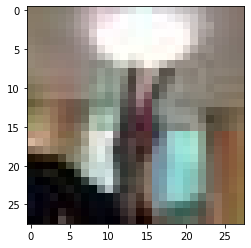

In [123]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [3.5582943e-07 9.9999964e-01 4.0863271e-10]
라벨: 0, 예측결과:1


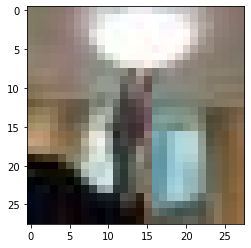

예측확률분포: [2.9954335e-03 1.7632996e-07 9.9700445e-01]
라벨: 0, 예측결과:2


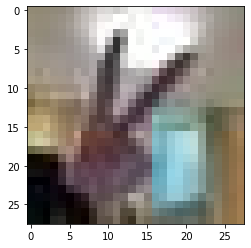

예측확률분포: [2.0671908e-07 9.9999976e-01 4.7944798e-10]
라벨: 0, 예측결과:1


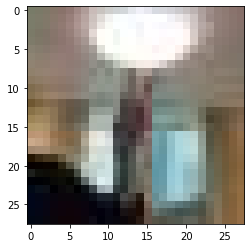

예측확률분포: [1.7176312e-06 9.9999833e-01 5.3993716e-09]
라벨: 0, 예측결과:1


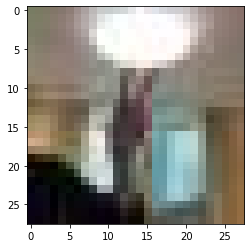

예측확률분포: [1.49798915e-02 9.85019922e-01 2.59655422e-07]
라벨: 0, 예측결과:1


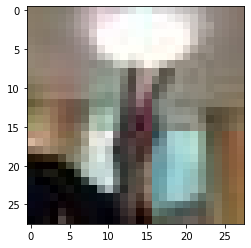

In [124]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels와 y_test가 다른 경우만 모은다
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
#wrong_predict_list에서 랜덤하게 5개만 뽑아서 출력
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과:" + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## v.1.0 가위, 바위, 이미지 분류하기
과제 내용 : 가위, 바위, 보 이미지를 데이터를 준비하고 CNN 으로 학습하여 다른 팀원의 이미지 데이터에 model를 적용해 본다.
* accuracy : 68.7 %
* 낮은 accuracy 이유 
1. 대부분 이미지 파일 생성시 연속촬영을 사용하여 실제 학습에 사용되는 data set 이 작은 것 같다.
2. 데이터의 중복성과 더불어 실제 data set도 부족
3. 테스트 데이터 set도 1명에서 나온 데이터라 정확도 향상에 영향을 준것으로 보인다. 실제로  사람마다 accuracy 차이가 많이 발생했음. 

* 9명 전체 데이터를 섞은 후에 그 중에서 랜덤으로 학습데이터와 시험 테이터를 분리한 후에 모델링 해 볼 필요가 있음

## v.1.1 이미지해상도를 28*28에서 56*56으로 조정
* accuracy : 81.0 %
* 이미지 학습에서 해상도에 영향을 받는 것으로 추정됨